### Exercise-1(a) 
### Python Program for Linear Regression using Least Square Method (Manual).

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing, svm, datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Input: Dataset 
data = pd.read_csv('headbrain.csv')

# Taking only two attributes of the Dataset
data_binary = data[['Head Size(cm^3)','Brain Weight(grams)']]
data_binary.columns = ['Head Size','Brain Weight']

# Eliminating NaN or missing input numbers 
data_binary.fillna(method ='ffill', inplace = True) 

# Dropping any rows with Nan values 
data_binary.dropna(inplace = True) 

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
X = np.array(data_binary['Head Size']).reshape(-1, 1) 
Y = np.array(data_binary['Brain Weight']).reshape(-1, 1)

# Splitting the data into training and testing data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25) 

# Mean X and Y
mean_x_train = np.mean(X_train)
mean_y_train = np.mean(Y_train)
mean_x_test = np.mean(X_test)
mean_y_test = np.mean(Y_test)

# Total number of values
n = len(X_train)

# Building the Model
num = 0
den = 0

# Using the Least Square Method to calculate 'm' and 'c'
for i in range(n):
    num += (X_train[i] - mean_x_train) * (Y_train[i] - mean_y_train)
    den += (X_train[i] - mean_x_train) ** 2
m1 = num / den
c1 = mean_y_train - (m1 * mean_x_train)

Y_pred1 = c1 + m1 * X_test

# Calculating Root Mean Squares Error & R2 Score
rmse = 0
ss_tot = 0
ss_res = 0
for i in range(len(Y_test)):
    y_pred1 = c1 + m1 * X_test[i]
    rmse += (Y_test[i] - y_pred1) ** 2
    ss_tot += (Y_test[i] - mean_y_test) ** 2
    ss_res += (Y_test[i] - y_pred1) ** 2

rmse = np.sqrt(rmse/len(Y_test))
r2 = 1 - (ss_res/ss_tot)

### Exercise-1(a) 
### Python Program for Linear Regression using Least Square Method (SciKit-Learn).

In [9]:
# Create Linear Regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred2 = regr.predict(X_test)

### Exercise-1(a) 
### Output and Comparison of Both Methods.

FOR LINEAR REGRESSION USING LEAST SQUARE METHOD MANUALLY 



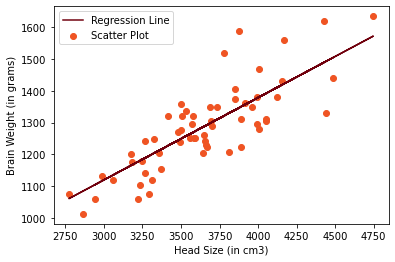


Coefficients: m =  [0.25944817]  ; c =  [340.81290085]

RMSE: 78.1742

R2 Score: 0.6652
_______________________________________________________________________


FOR LINEAR REGRESSION USING LEAST SQUARE METHOD WITH SCIKIT-LEARN



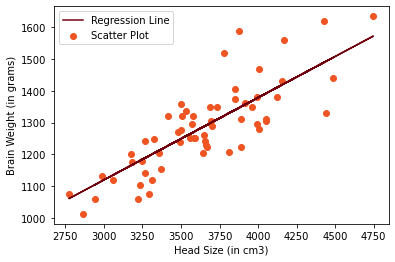


Coefficients: m =  [[0.25944817]]  ; c =  [340.81290085]

RMSE: 78.1742

R2 Score: 0.6652


In [10]:
# For Manual Method
# Plotting Line and Scatter Points
plt.plot(X_test, Y_pred1, color='#70000d', label='Regression Line')
plt.scatter(X_test, Y_test, c='#ef5423', label='Scatter Plot')
plt.xlabel('Head Size (in cm3)')
plt.ylabel('Brain Weight (in grams)')
plt.legend()
# Output: The Plot for Regression Line, Coefficients, RMSE and the R2 Score
print("FOR LINEAR REGRESSION USING LEAST SQUARE METHOD MANUALLY \n")
plt.show()
print("\nCoefficients: m = ",m1," ; c = ", c1)
print('\nRMSE: %.4f' %rmse)
print('\nR2 Score: %.4f' %r2)

# For SciKit-Learn Method
# Plotting Line and Scatter Points
plt.plot(X_test, Y_pred2, color='#70000d', label='Regression Line')
plt.scatter(X_test, Y_test, c='#ef5423', label='Scatter Plot')
plt.xlabel('Head Size (in cm3)')
plt.ylabel('Brain Weight (in grams)')
plt.legend()
# Output: The Plot for Regression Line, Coefficients, RMSE and the R2 Score.
print("_______________________________________________________________________\n")
print("\nFOR LINEAR REGRESSION USING LEAST SQUARE METHOD WITH SCIKIT-LEARN\n")
plt.show()
print("\nCoefficients: m = ",regr.coef_," ; c = ", regr.intercept_)
print("\nRMSE: %.4f" % mean_squared_error(Y_test, Y_pred2, squared = False))
print('\nR2 Score: %.4f' % r2_score(Y_test, Y_pred2))

##### On comparison, we can see that both the methods (viz. Least Square Method Manually and Least Square Method with SciKit-Learn) return same value of the Coefficients as well as the Root Mean Square Error and R2 Score.